In [1]:
# Step 1: Import Required Libraries

In [2]:
# Data handling and numerical operations
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

# Machine learning tools
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# To suppress warnings (optional)
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Step 2: Load and Explore the Dataset

In [4]:
# Load the dataset (assuming 'data.csv' is provided)
data = pd.read_csv('exam_house_dataset.csv')

# Display first 5 rows
print(data.head())

# Check dataset structure
print("\nDataset Info:")
print(data.info())

# Descriptive statistics
print("\nDescriptive Statistics:")
print(data.describe())

   Study_Hours  Exam_Score  House_Area_sqft  House_Price_USD
0          5.7          89              800           268078
1          4.8          81              800           299443
2          6.0          80              800           243034
3          7.3          81              978           331515
4          4.6          78             1335           322717

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Study_Hours      1000 non-null   float64
 1   Exam_Score       1000 non-null   int64  
 2   House_Area_sqft  1000 non-null   int64  
 3   House_Price_USD  1000 non-null   int64  
dtypes: float64(1), int64(3)
memory usage: 31.4 KB
None

Descriptive Statistics:
       Study_Hours   Exam_Score  House_Area_sqft  House_Price_USD
count  1000.000000  1000.000000      1000.000000      1000.000000
mean      5.034700    75.

In [5]:
# Step 3: Data Visualization (Scatter Plot)

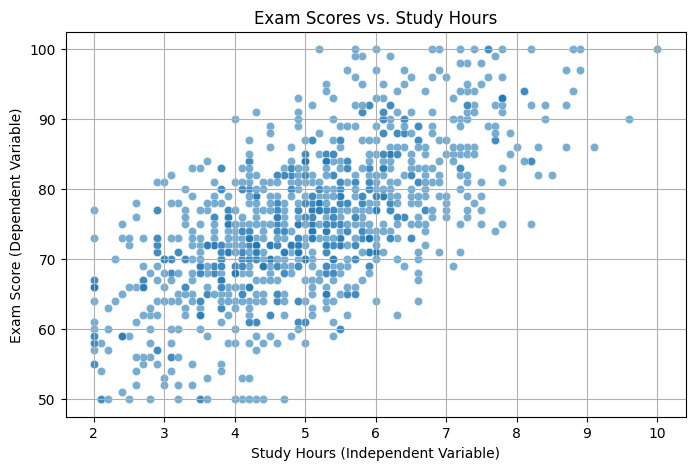

In [6]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=data['Study_Hours'], y=data['Exam_Score'], alpha=0.6)
plt.title('Exam Scores vs. Study Hours')
plt.xlabel('Study Hours (Independent Variable)')
plt.ylabel('Exam Score (Dependent Variable)')
plt.grid(True)
plt.show()

In [7]:
# Step 4: Data Preprocessing

In [8]:
# Splitting for Exam Score prediction
X_exam = data[['Study_Hours']]  # Feature (must be 2D array)
y_exam = data['Exam_Score']      # Target

X_train_exam, X_test_exam, y_train_exam, y_test_exam = train_test_split(
    X_exam, y_exam, test_size=0.2, random_state=42
)

print("Exam Score Prediction:")
print(f"Training set size: {X_train_exam.shape[0]} records")
print(f"Test set size: {X_test_exam.shape[0]} records")


# Splitting for House Price prediction
X_house = data[['House_Area_sqft']]  # Feature
y_house = data['House_Price_USD']     # Target

X_train_house, X_test_house, y_train_house, y_test_house = train_test_split(
    X_house, y_house, test_size=0.2, random_state=42
)

print("\nHouse Price Prediction:")
print(f"Training set size: {X_train_house.shape[0]} records")
print(f"Test set size: {X_test_house.shape[0]} records")

Exam Score Prediction:
Training set size: 800 records
Test set size: 200 records

House Price Prediction:
Training set size: 800 records
Test set size: 200 records


In [9]:
# Step 5: Train the Linear Regression Model

In [10]:
#1 Initialize and fit the exam score model
exam_model = LinearRegression()
exam_model.fit(X_train_exam, y_train_exam)

# Display coefficients and interpretation
print("Exam Score Model Results:")
print(f"Intercept (b0): {exam_model.intercept_:.2f}")
print(f"Slope (Study Hours coefficient): {exam_model.coef_[0]:.2f}")

# Interpretation
print("\nInterpretation:")
print("- Intercept: A student who studies 0 hours would expect a score of ~{:.0f} points".format(exam_model.intercept_))
print("- Slope: Each additional hour of study is associated with a {:.2f} point increase in exam score".format(exam_model.coef_[0]))


#2 Initialize and fit the house price model
house_model = LinearRegression()
house_model.fit(X_train_house, y_train_house)

# Display coefficients and interpretation
print("\nHouse Price Model Results:")
print(f"Intercept (b0): ${house_model.intercept_:,.2f}")
print(f"Slope (House Area coefficient): ${house_model.coef_[0]:.2f} per sq ft")

# Interpretation
print("\nInterpretation:")
print("- Base price (0 sq ft): ${:,.0f}".format(house_model.intercept_))
print("- Price per sq ft: ${:.2f}".format(house_model.coef_[0]))

Exam Score Model Results:
Intercept (b0): 52.14
Slope (Study Hours coefficient): 4.61

Interpretation:
- Intercept: A student who studies 0 hours would expect a score of ~52 points
- Slope: Each additional hour of study is associated with a 4.61 point increase in exam score

House Price Model Results:
Intercept (b0): $106,751.79
Slope (House Area coefficient): $194.50 per sq ft

Interpretation:
- Base price (0 sq ft): $106,752
- Price per sq ft: $194.50


In [11]:
# Step 6: Make Predictions and Evaluate Model

In [12]:
#1 Make predictions on exam test set
y_pred_exam = exam_model.predict(X_test_exam)

# Calculate evaluation metrics
mae_exam = mean_absolute_error(y_test_exam, y_pred_exam)
mse_exam = mean_squared_error(y_test_exam, y_pred_exam)
rmse_exam = np.sqrt(mse_exam)
r2_exam = r2_score(y_test_exam, y_pred_exam)

# Print results with interpretation
print("\nExam Score Model Evaluation:")
print(f"MAE: {mae_exam:.2f} points")
print(f"MSE: {mse_exam:.2f} points²")
print(f"RMSE: {rmse_exam:.2f} points")
print(f"R² Score: {r2_exam:.2f} (1 is perfect)")

# Interpretation
print("\nInterpretation:")
print(f"- Average prediction error: ±{mae_exam:.1f} points")
print(f"- {r2_exam:.0%} of score variance is explained by study hours")



#2 Make predictions on house price test set
y_pred_house = house_model.predict(X_test_house)

# Calculate evaluation metrics
mae_house = mean_absolute_error(y_test_house, y_pred_house)
mse_house = mean_squared_error(y_test_house, y_pred_house)
rmse_house = np.sqrt(mse_house)
r2_house = r2_score(y_test_house, y_pred_house)

# Print results with interpretation
print("\nHouse Price Model Evaluation:")
print(f"MAE: ${mae_house:,.2f}")
print(f"MSE: ${mse_house:,.0f} (dollars squared)")
print(f"RMSE: ${rmse_house:,.2f}")
print(f"R² Score: {r2_house:.2f} (1 is perfect)")

# Interpretation
print("\nInterpretation:")
print(f"- Average prediction error: ±${mae_house:,.0f}")
print(f"- {r2_house:.0%} of price variance is explained by house area")


Exam Score Model Evaluation:
MAE: 6.18 points
MSE: 61.41 points²
RMSE: 7.84 points
R² Score: 0.45 (1 is perfect)

Interpretation:
- Average prediction error: ±6.2 points
- 45% of score variance is explained by study hours

House Price Model Evaluation:
MAE: $20,525.89
MSE: $698,494,324 (dollars squared)
RMSE: $26,429.04
R² Score: 0.94 (1 is perfect)

Interpretation:
- Average prediction error: ±$20,526
- 94% of price variance is explained by house area


In [13]:
# Step 7: Visualize Regression Line vs Actual Data

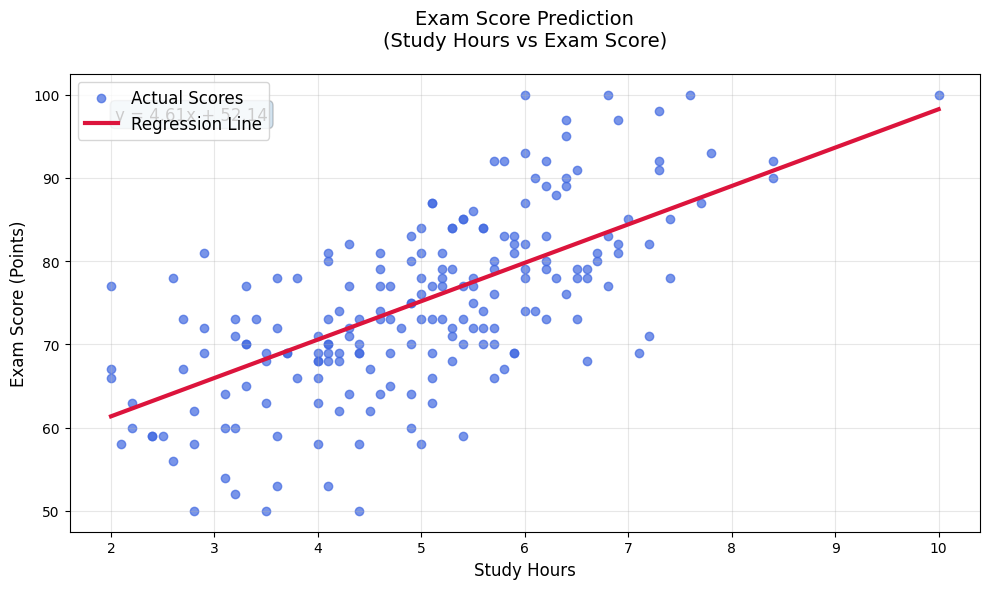

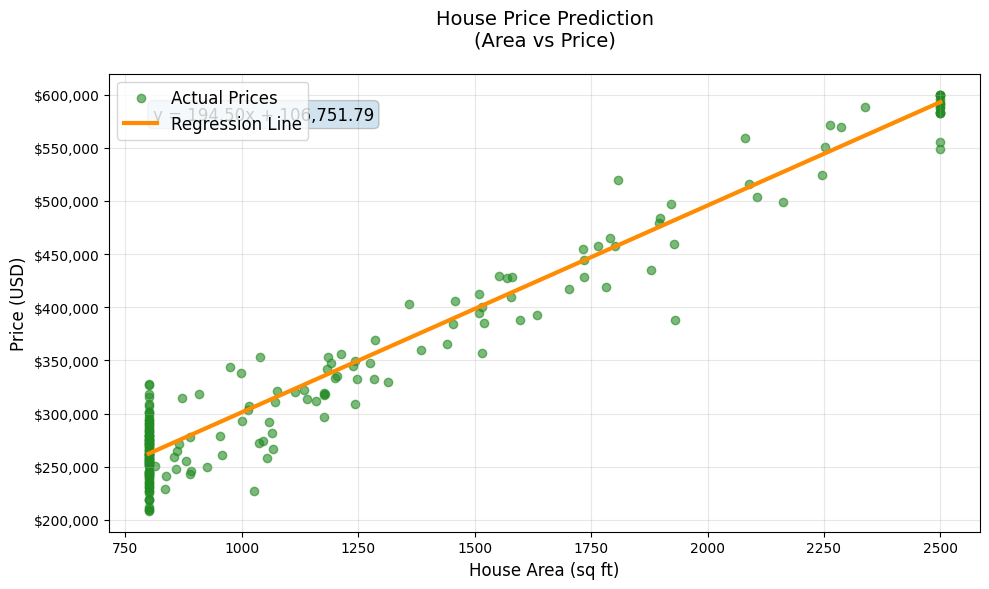

In [14]:
#1 For Exam Score Prediction

plt.figure(figsize=(10, 6))

# Scatter plot of actual test data
plt.scatter(X_test_exam, y_test_exam, color='royalblue', alpha=0.7, label='Actual Scores')

# Regression line
sorted_idx = X_test_exam.squeeze().argsort()
plt.plot(X_test_exam.iloc[sorted_idx], y_pred_exam[sorted_idx], 
         color='crimson', linewidth=3, label='Regression Line')

# Formatting
plt.title('Exam Score Prediction\n(Study Hours vs Exam Score)', pad=20, fontsize=14)
plt.xlabel('Study Hours', fontsize=12)
plt.ylabel('Exam Score (Points)', fontsize=12)
plt.grid(alpha=0.3)
plt.legend(fontsize=12)

# Annotate model equation
equation = f'y = {exam_model.coef_[0]:.2f}x + {exam_model.intercept_:.2f}'
plt.annotate(equation, xy=(0.05, 0.9), xycoords='axes fraction', 
             fontsize=12, bbox=dict(boxstyle='round', alpha=0.2))

plt.tight_layout()
plt.show()

#2 For House Price Prediction

plt.figure(figsize=(10, 6))

# Scatter plot of actual test data
plt.scatter(X_test_house, y_test_house, color='forestgreen', alpha=0.6, label='Actual Prices')

# Regression line
sorted_idx = X_test_house.squeeze().argsort()
plt.plot(X_test_house.iloc[sorted_idx], y_pred_house[sorted_idx], 
         color='darkorange', linewidth=3, label='Regression Line')

# Formatting
plt.title('House Price Prediction\n(Area vs Price)', pad=20, fontsize=14)
plt.xlabel('House Area (sq ft)', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.grid(alpha=0.3)
plt.legend(fontsize=12)

# Format y-axis as currency
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
plt.gca().yaxis.set_major_formatter(tick)

# Annotate model equation
equation = f'y = {house_model.coef_[0]:.2f}x + {house_model.intercept_:,.2f}'
plt.annotate(equation, xy=(0.05, 0.9), xycoords='axes fraction', 
             fontsize=12, bbox=dict(boxstyle='round', alpha=0.2))

plt.tight_layout()
plt.show()